## Explore Image data used in Multimodal Search in BigQuery

Author: Charulata Shelar

This notebook can be referenced when reading medium blog series:

- [Blog 1](https://medium.com/google-cloud/gemini-in-bigquery-a-comprehensive-guide-to-multimodal-data-analysis-part-1-d7a9d246080e)
- [Blog 2](https://medium.com/@charulatashelar/gemini-in-bigquery-unlocking-multimodal-search-with-vector-embeddings-part-2-69e26c36fee5)


**Objective:** This notebook explores the image data that is used in multimodal search in BigQuery.

**Background:** Multimodal search allows users to search for information using a combination of text and images. For example, a user might search for "red shoes" and then refine their search by selecting an image of a particular style of shoe.

**Dataset:** This notebook uses a dataset of images. The dataset is stored in BigQuery.


## Setup

### Set up credentials

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

PROJECT_ID='projects-charushelar'
from google.cloud import bigquery
client = bigquery.Client(PROJECT_ID)

### Enable data table display

In [35]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


### Util function to display images

In [ ]:
import io
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

def printImages(results):
 image_results_list = list(results)
 amt_of_images = len(image_results_list)

 fig, axes = plt.subplots(nrows=amt_of_images, ncols=2, figsize=(20, 20))
 fig.tight_layout()
 fig.subplots_adjust(hspace=0.5)
 for i in range(amt_of_images):
   gcs_uri = image_results_list[i][0]
   text = image_results_list[i][1]
   f = tf.io.gfile.GFile(gcs_uri, 'rb')
   stream = io.BytesIO(f.read())
   img = Image.open(stream)
   axes[i, 0].axis('off')
   axes[i, 0].imshow(img)
   axes[i, 1].axis('off')
   axes[i, 1].text(0, 0, text, fontsize=10)
 plt.show()

### Display Product images (vector search)

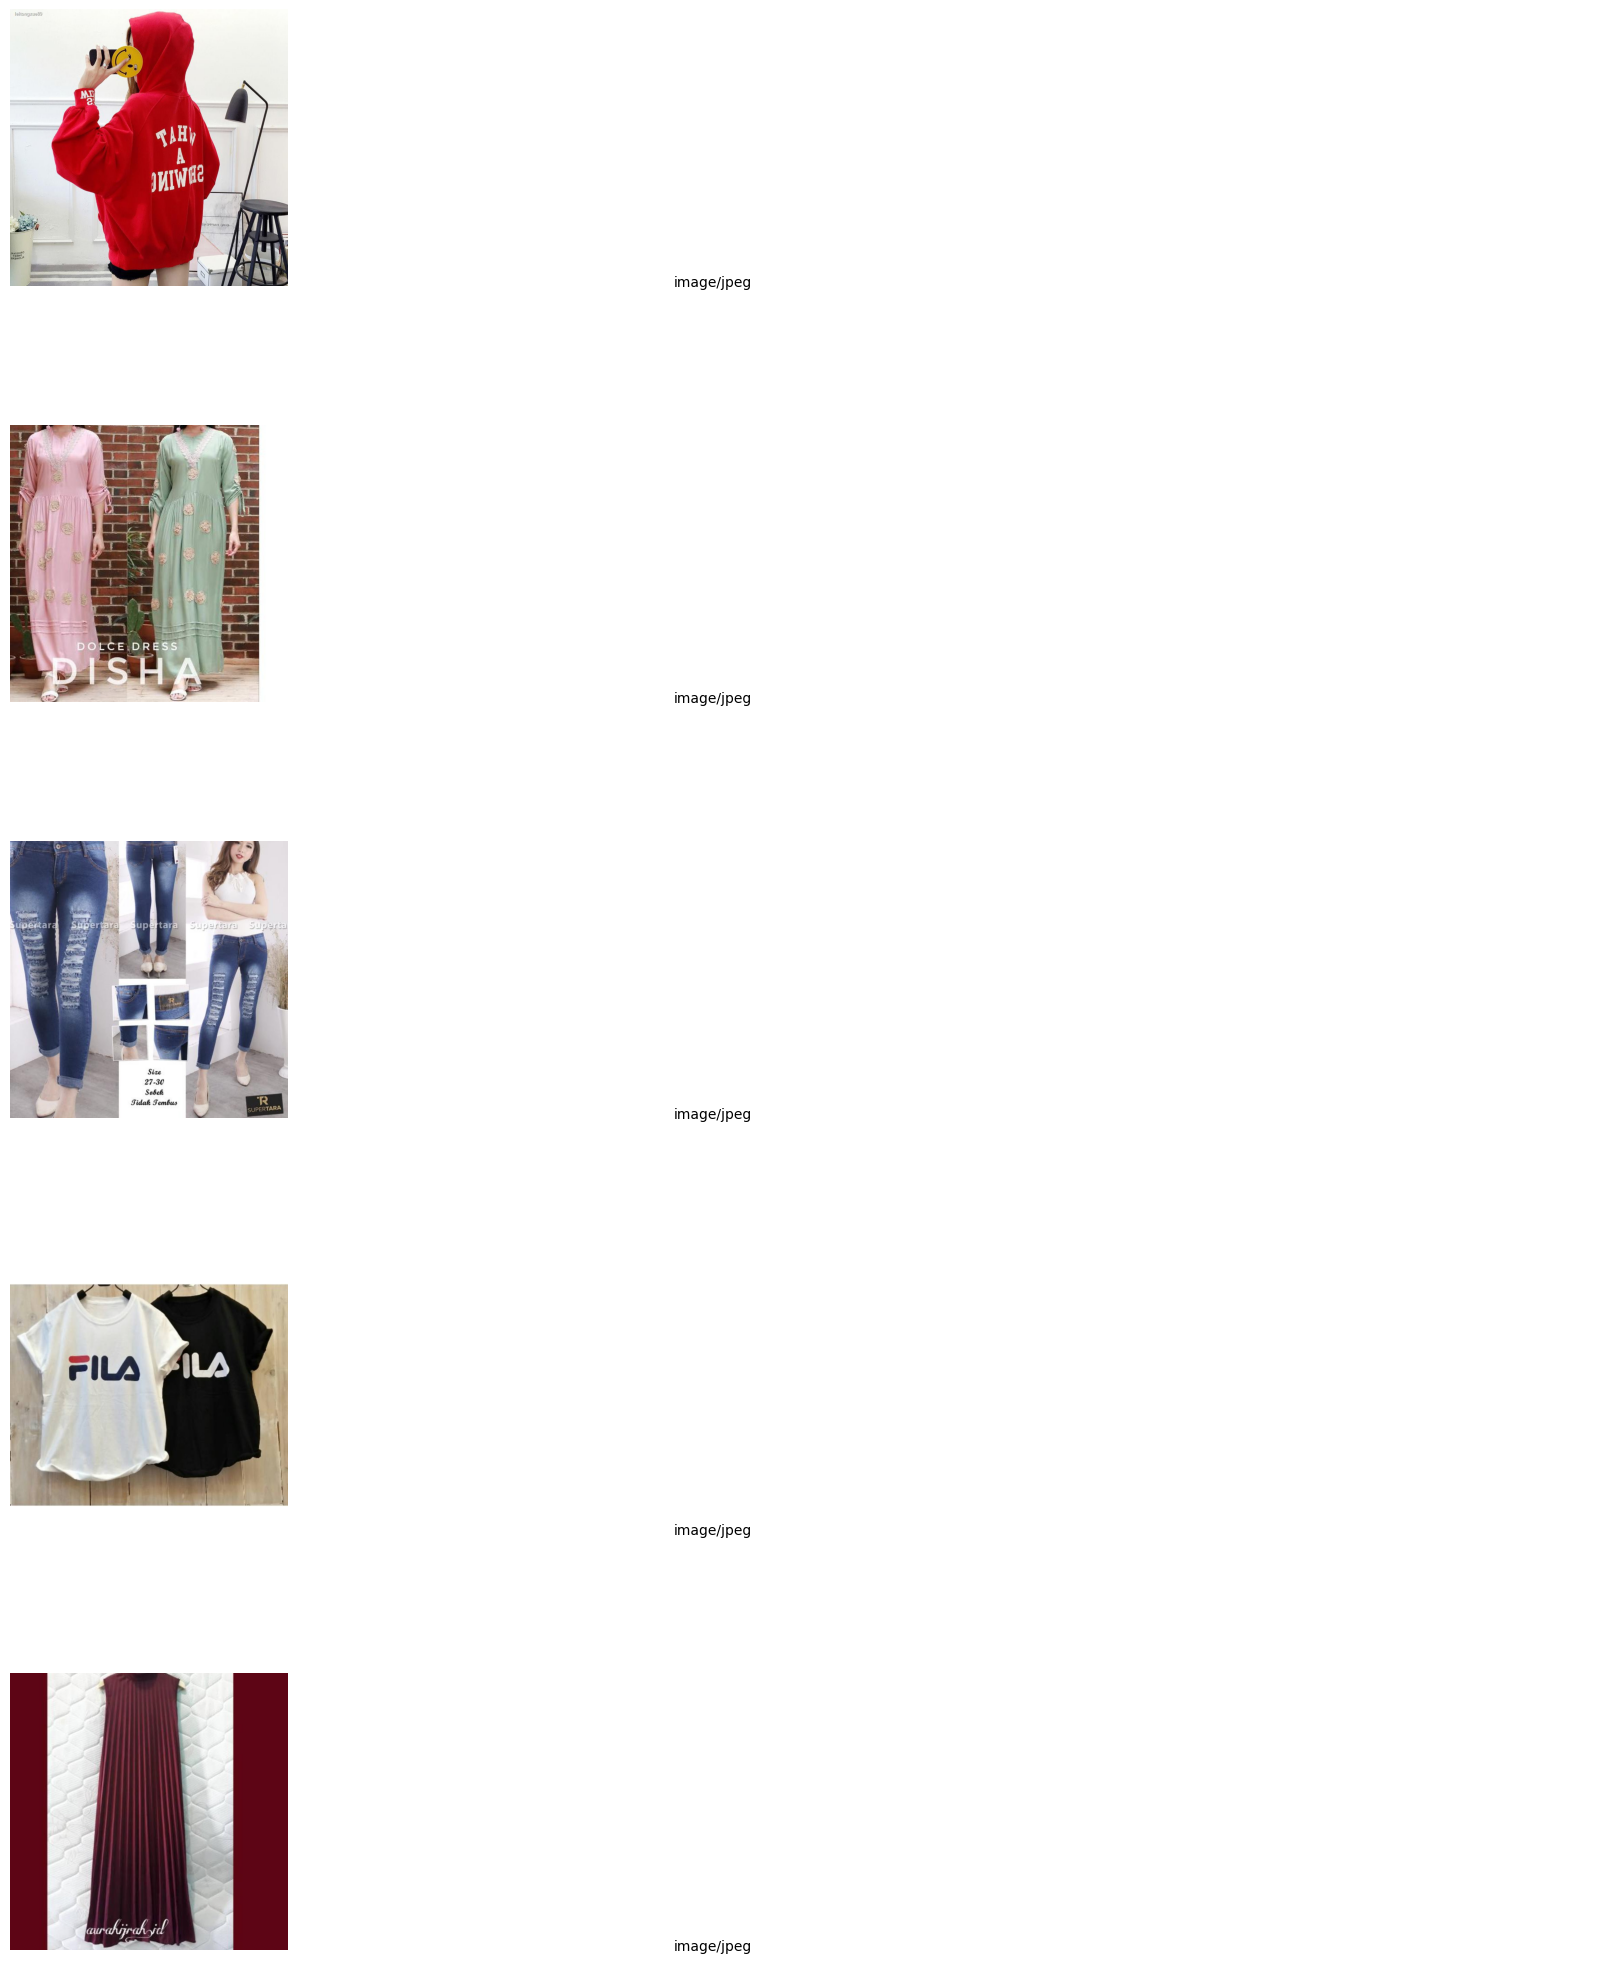

In [ ]:
inspect_obj_table_query = """
SELECT uri, content_type
FROM bqml_mm_search.product_images
WHERE content_type = 'image/jpeg'
Order by uri
LIMIT 5;
"""
printImages(client.query(inspect_obj_table_query))

## Example 1: Image-to-Image Search

### Display Input images (test images)

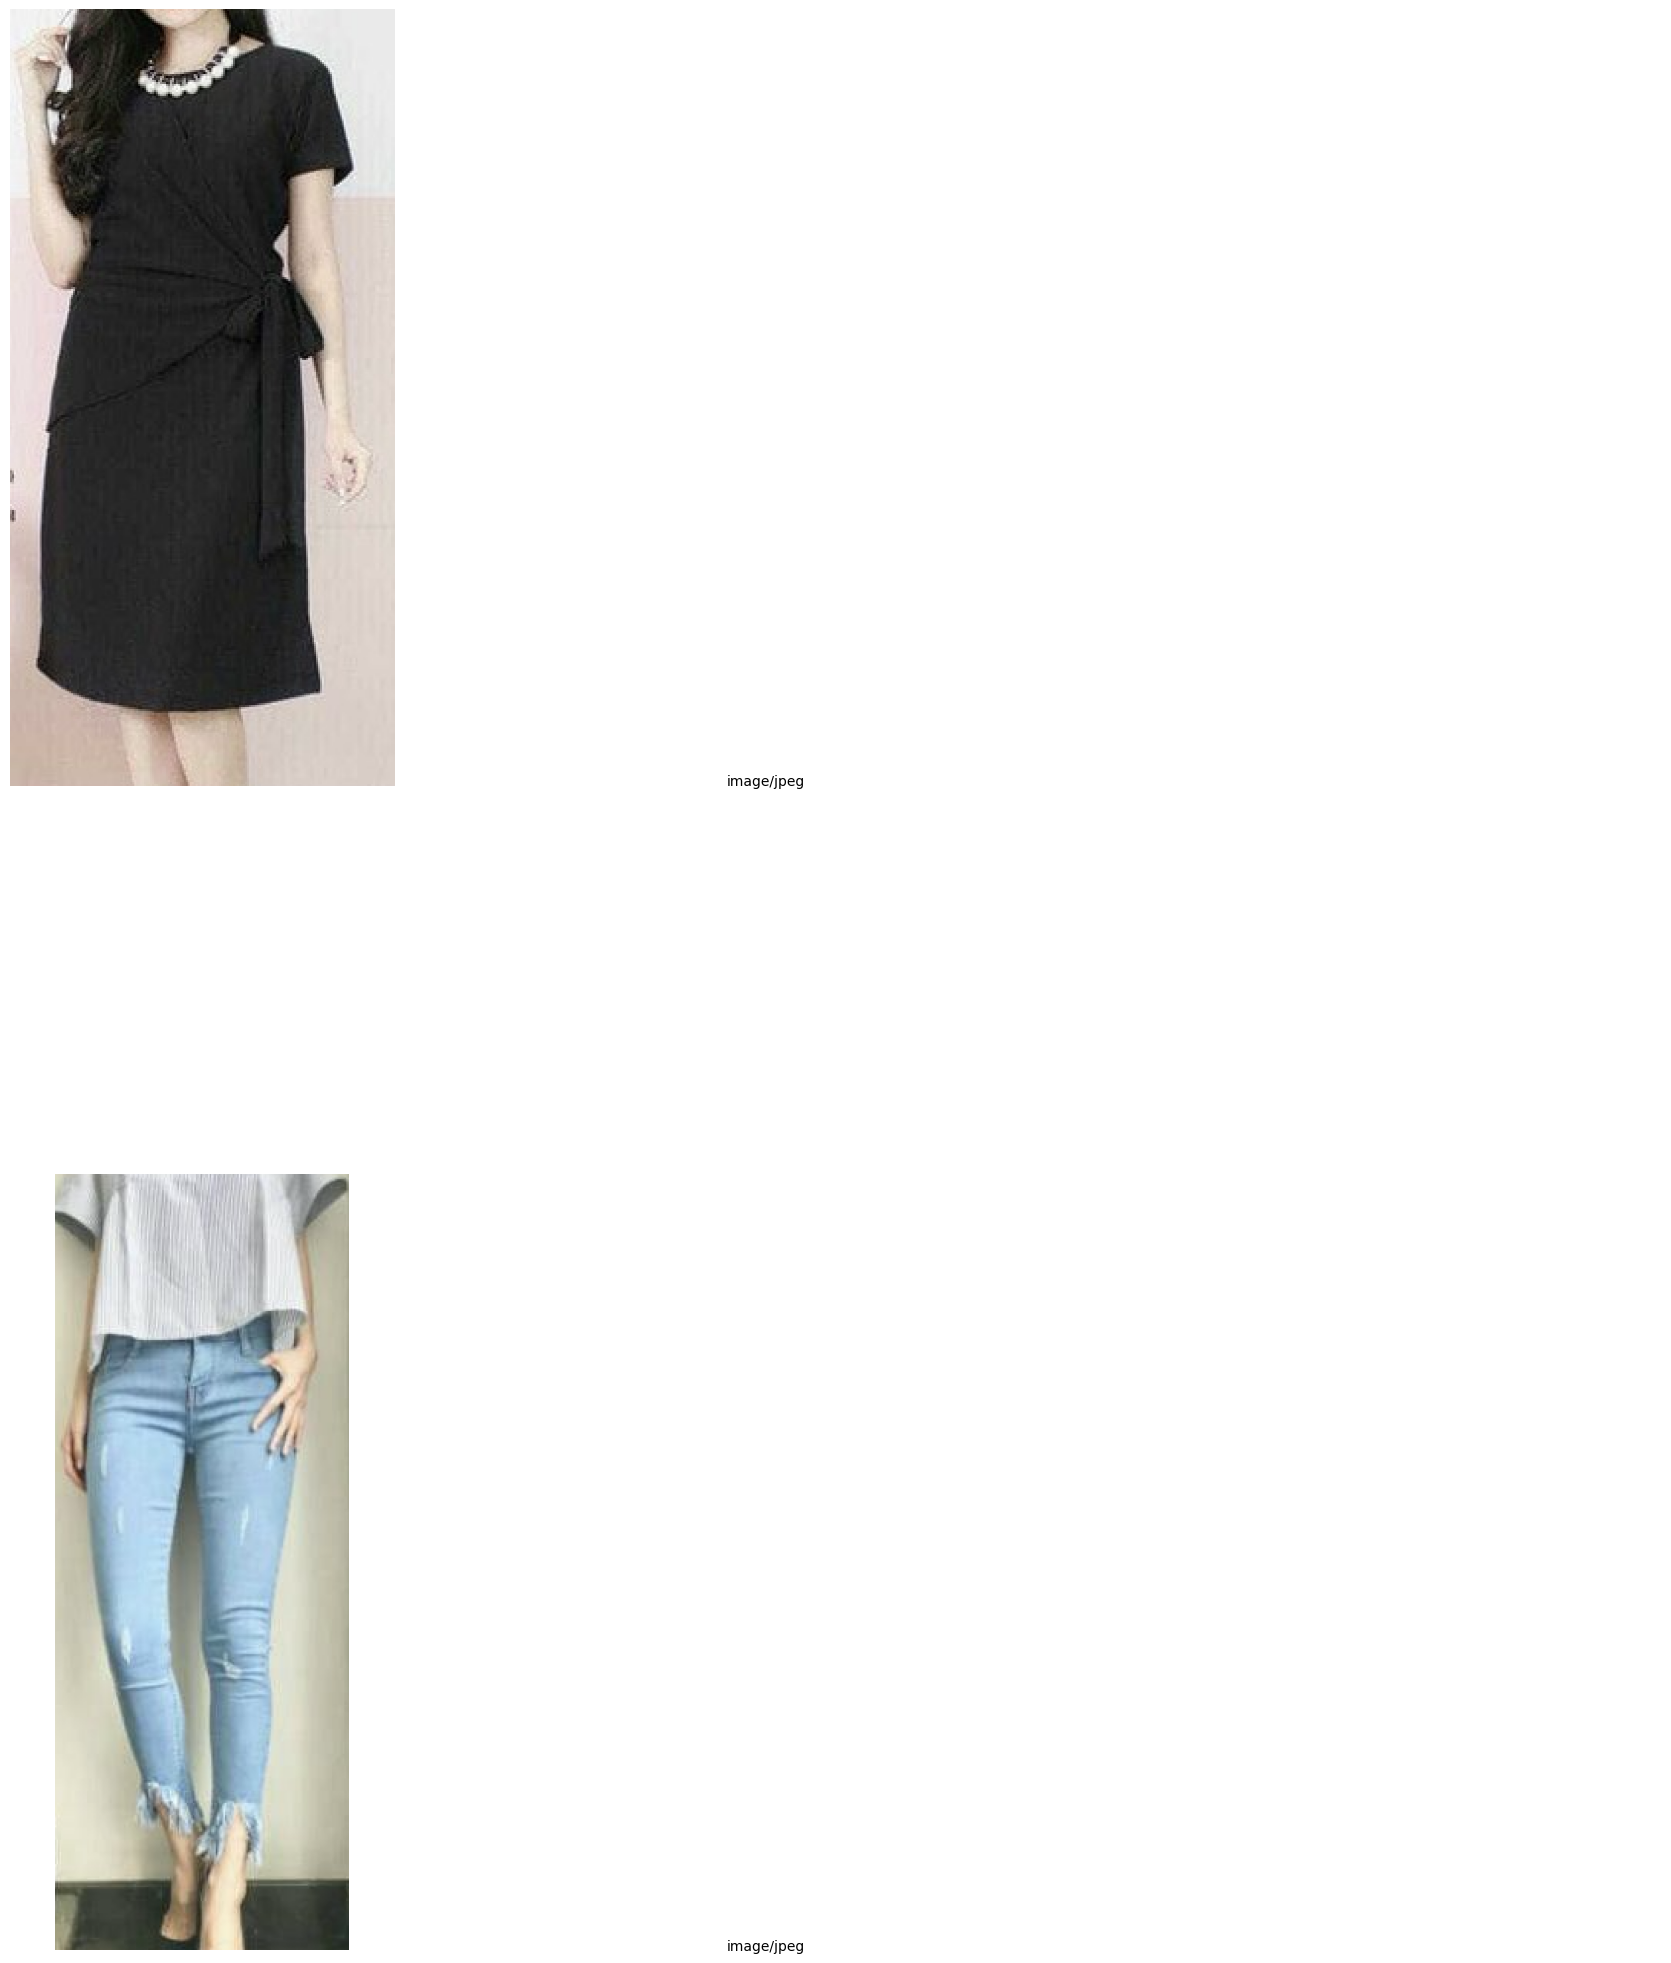

In [ ]:
inspect_obj_table_query = """
SELECT uri, content_type
FROM bqml_mm_search.search_product_image_embeddings
WHERE uri like '%gs://mm_product_search/test_images/test %'
"""
printImages(client.query(inspect_obj_table_query))

### Display Result Product images

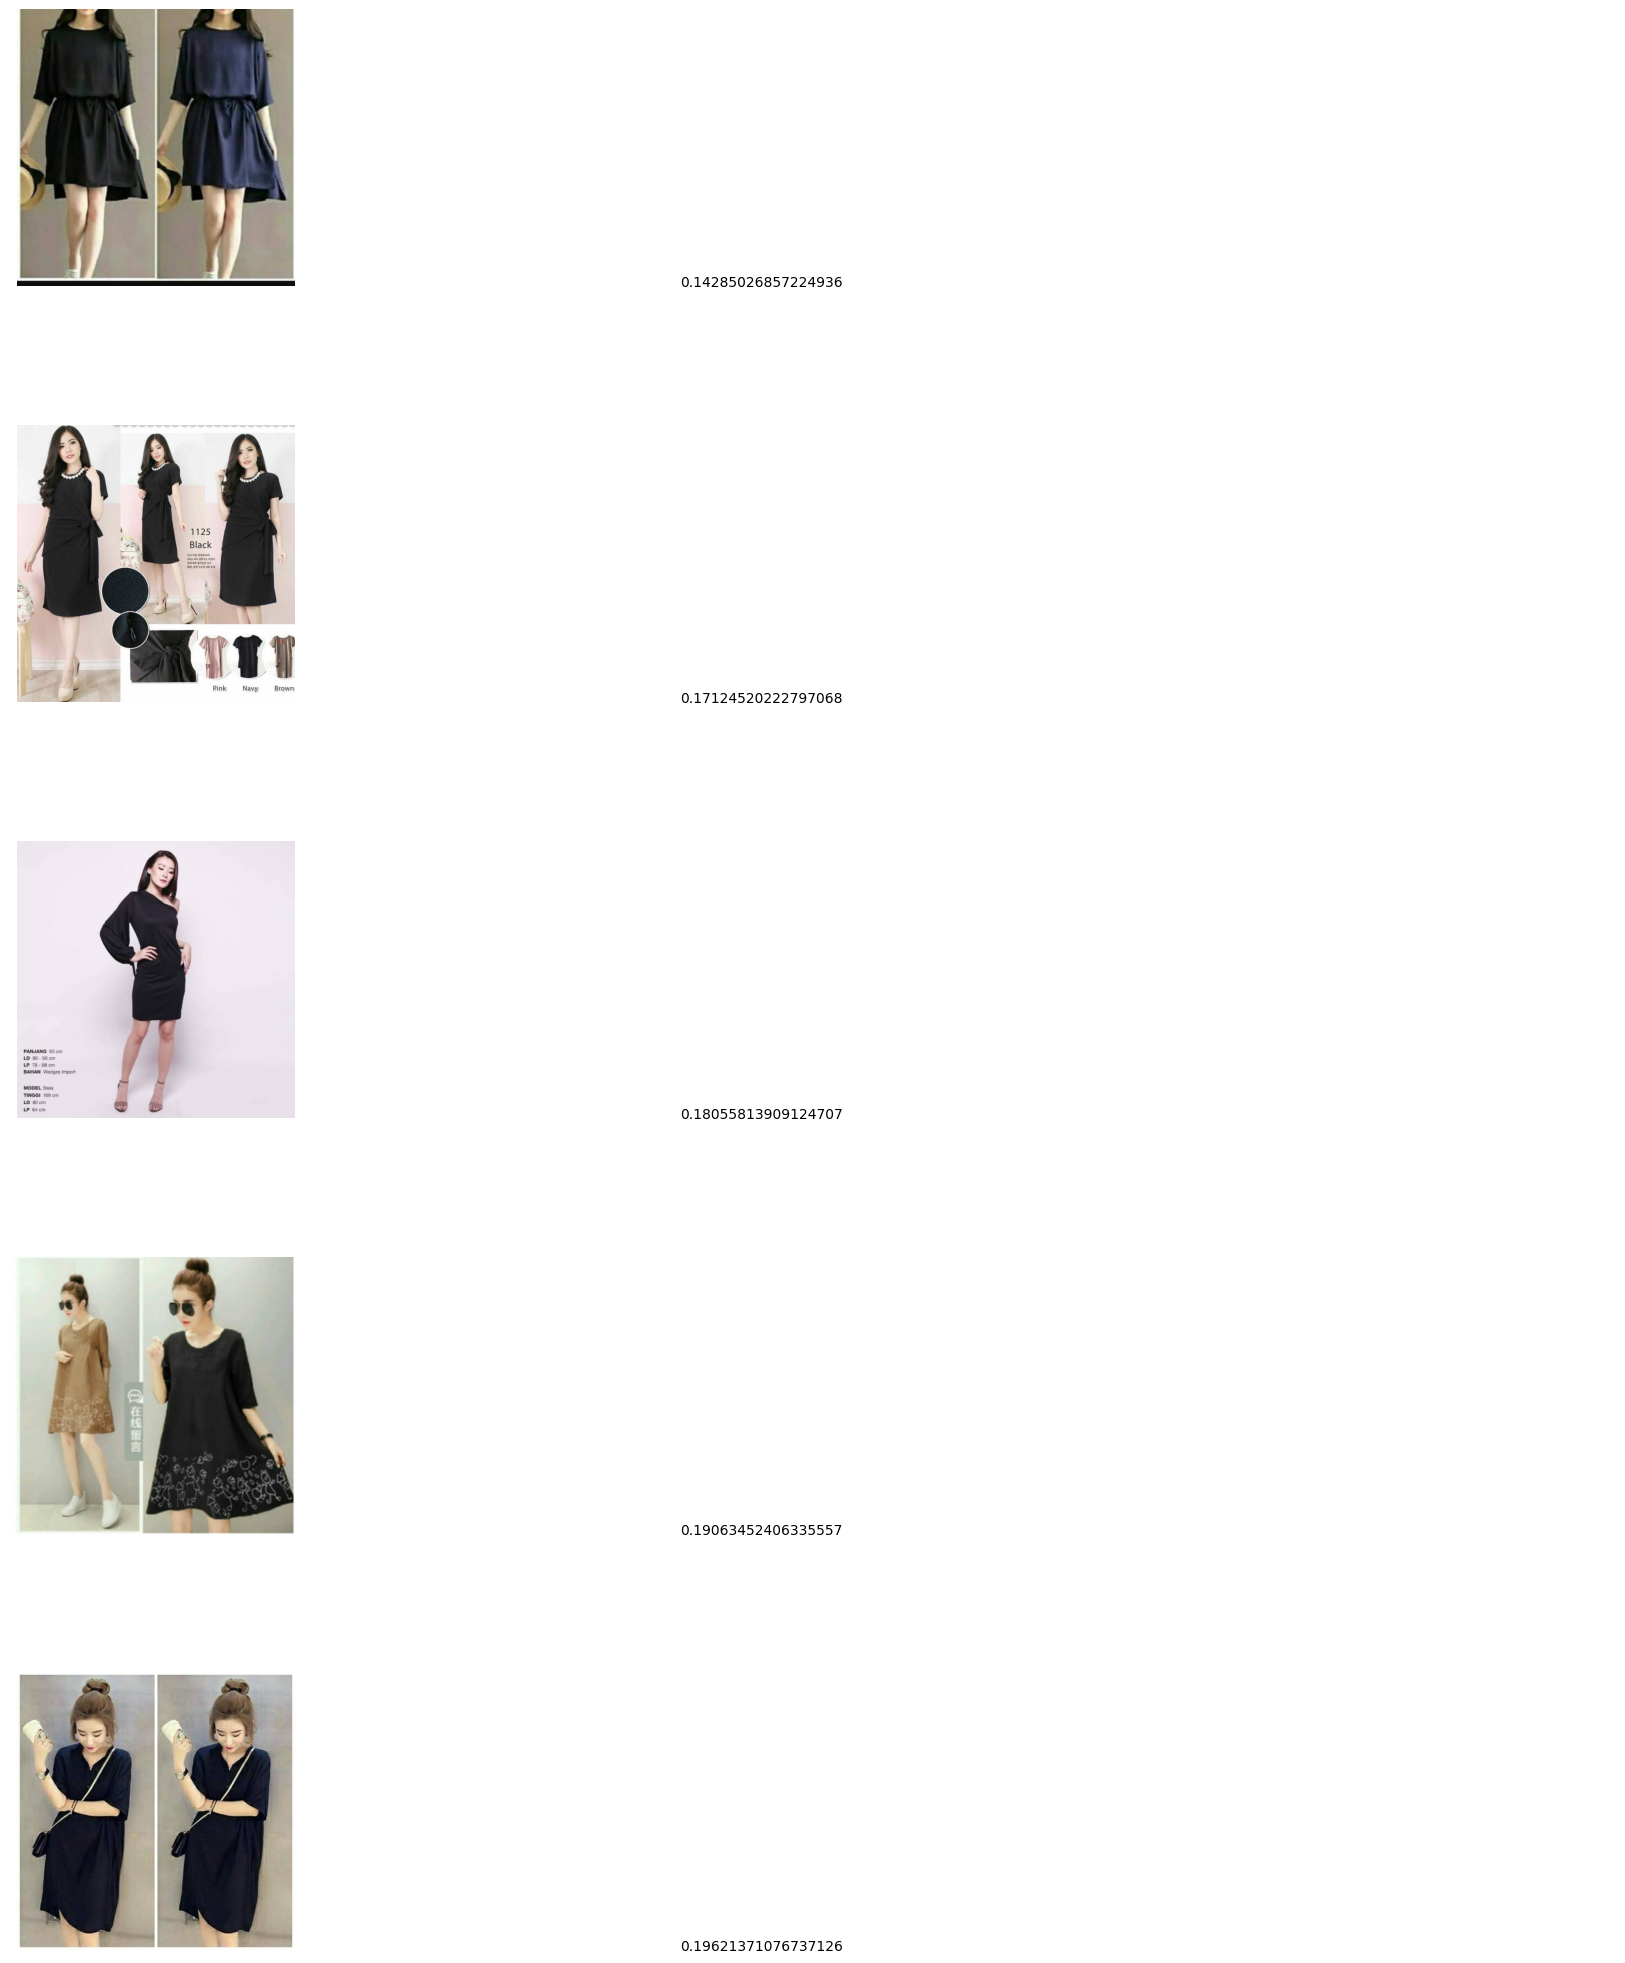

In [ ]:
query = """
  SELECT gcs_uri, distance FROM `bqml_mm_search.vector_image_search_results`
  ORDER BY distance;
"""

printImages(client.query(query))

## Example 2 : Text-to-image Seach

### Display Product images (test images)

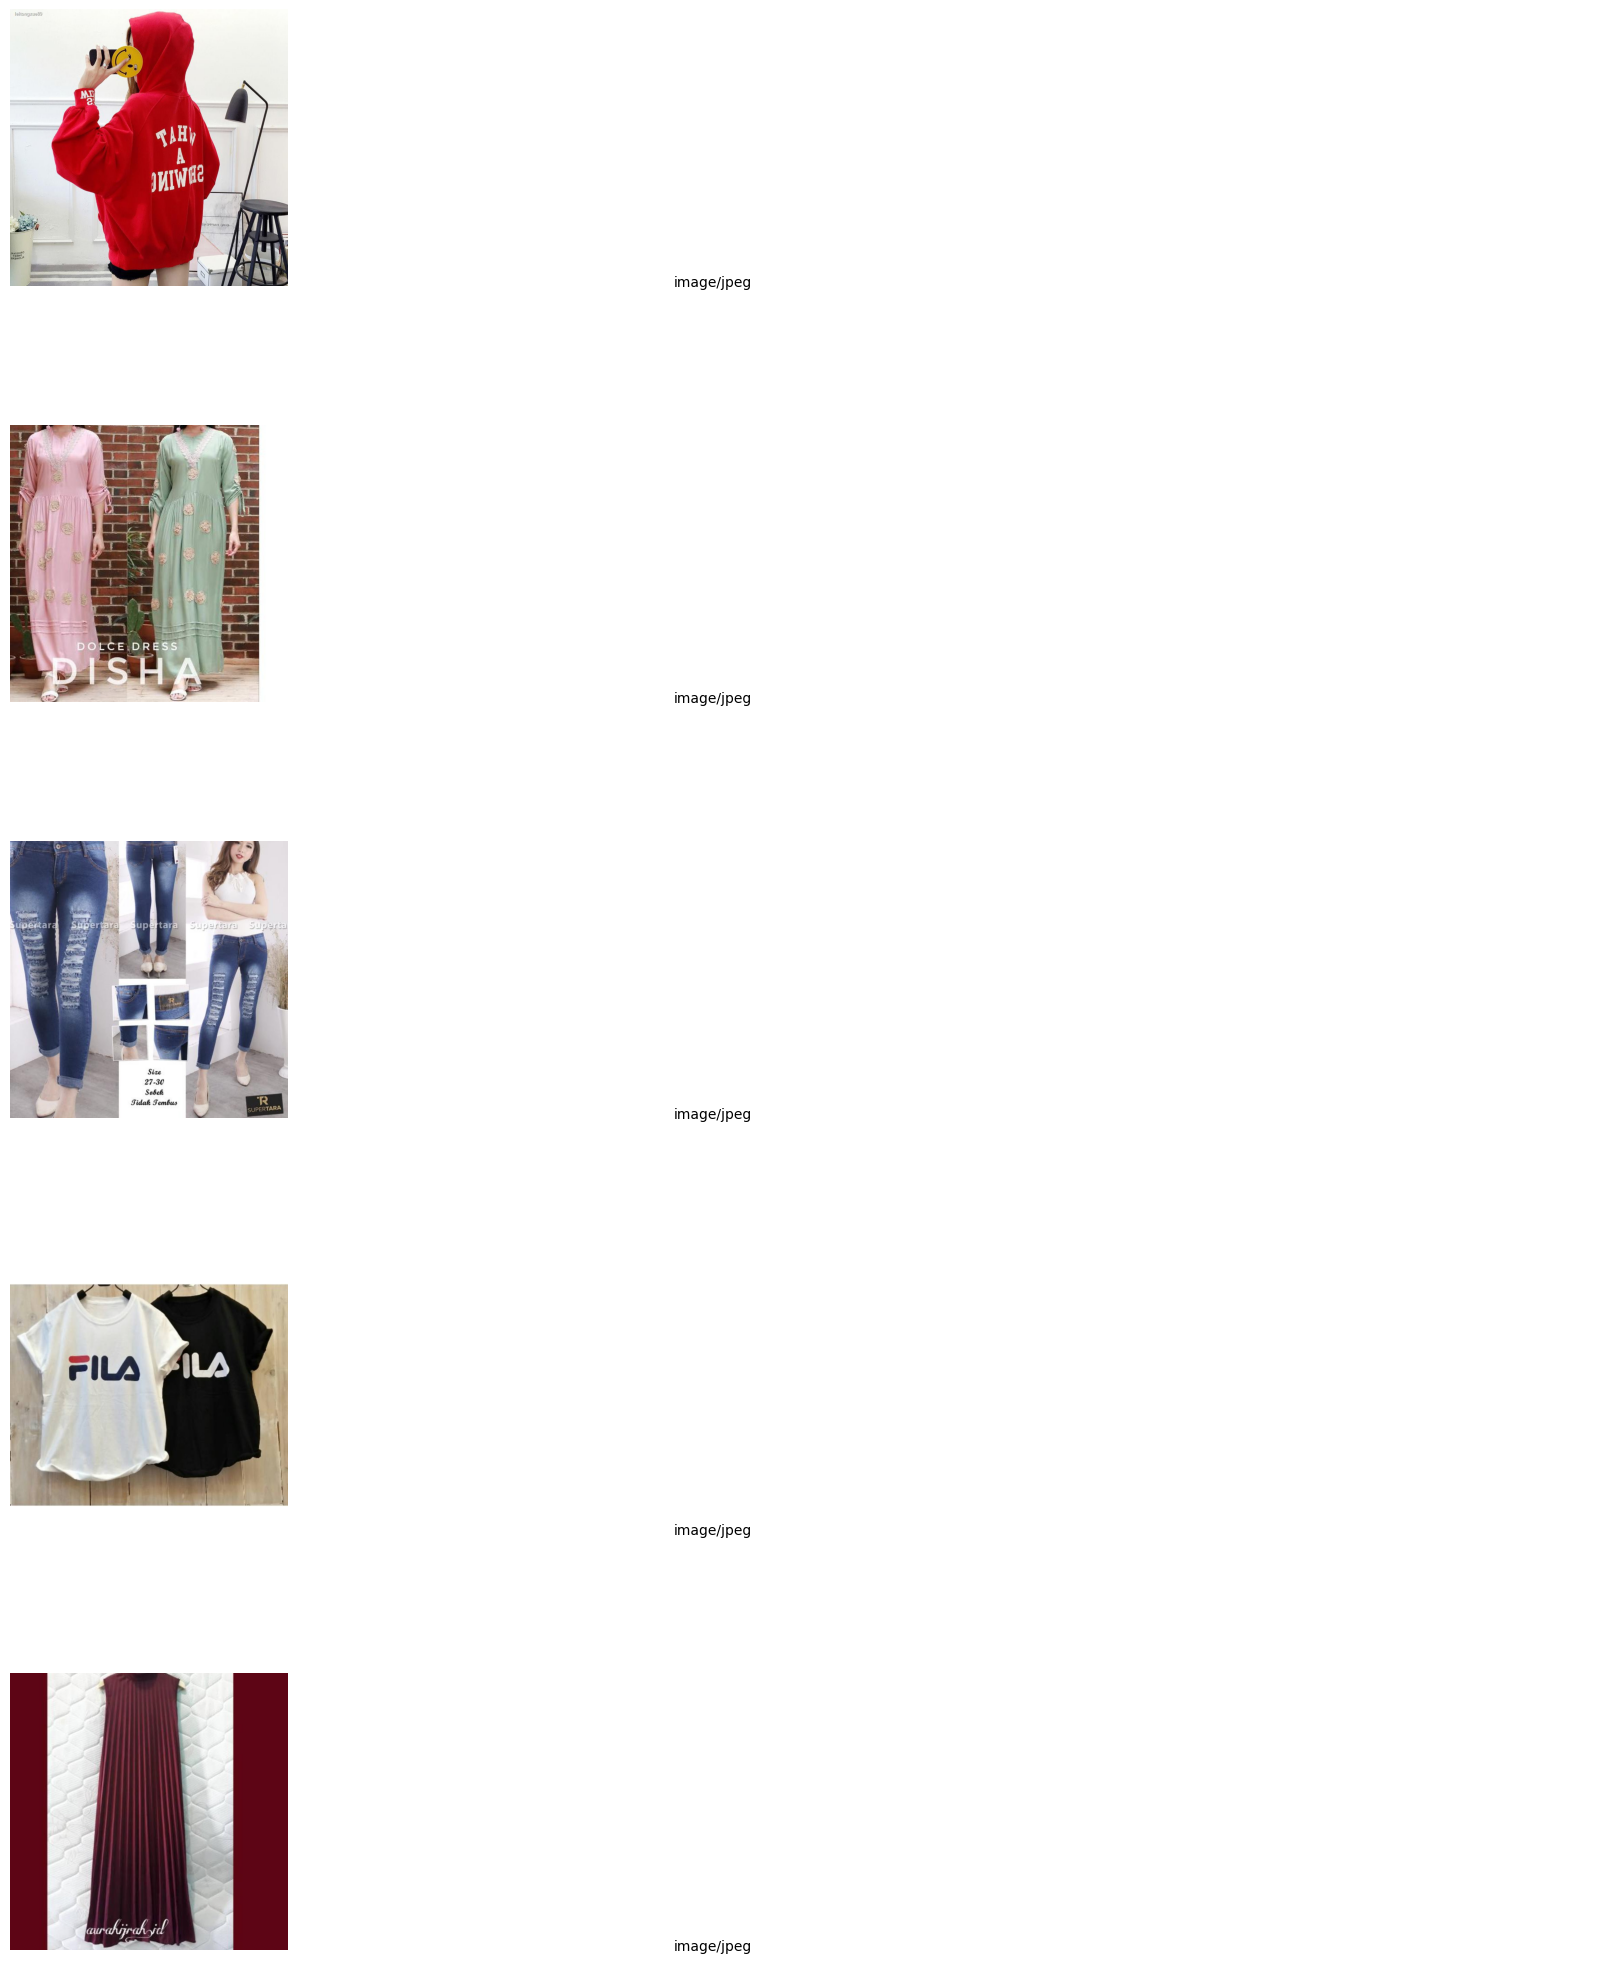

In [34]:
inspect_obj_table_query = """
SELECT uri, content_type
FROM bqml_mm_search.product_image_embeddings
WHERE content_type = 'image/jpeg'
Order by uri
LIMIT 5;
"""
printImages(client.query(inspect_obj_table_query))

### Visualize the vector search results

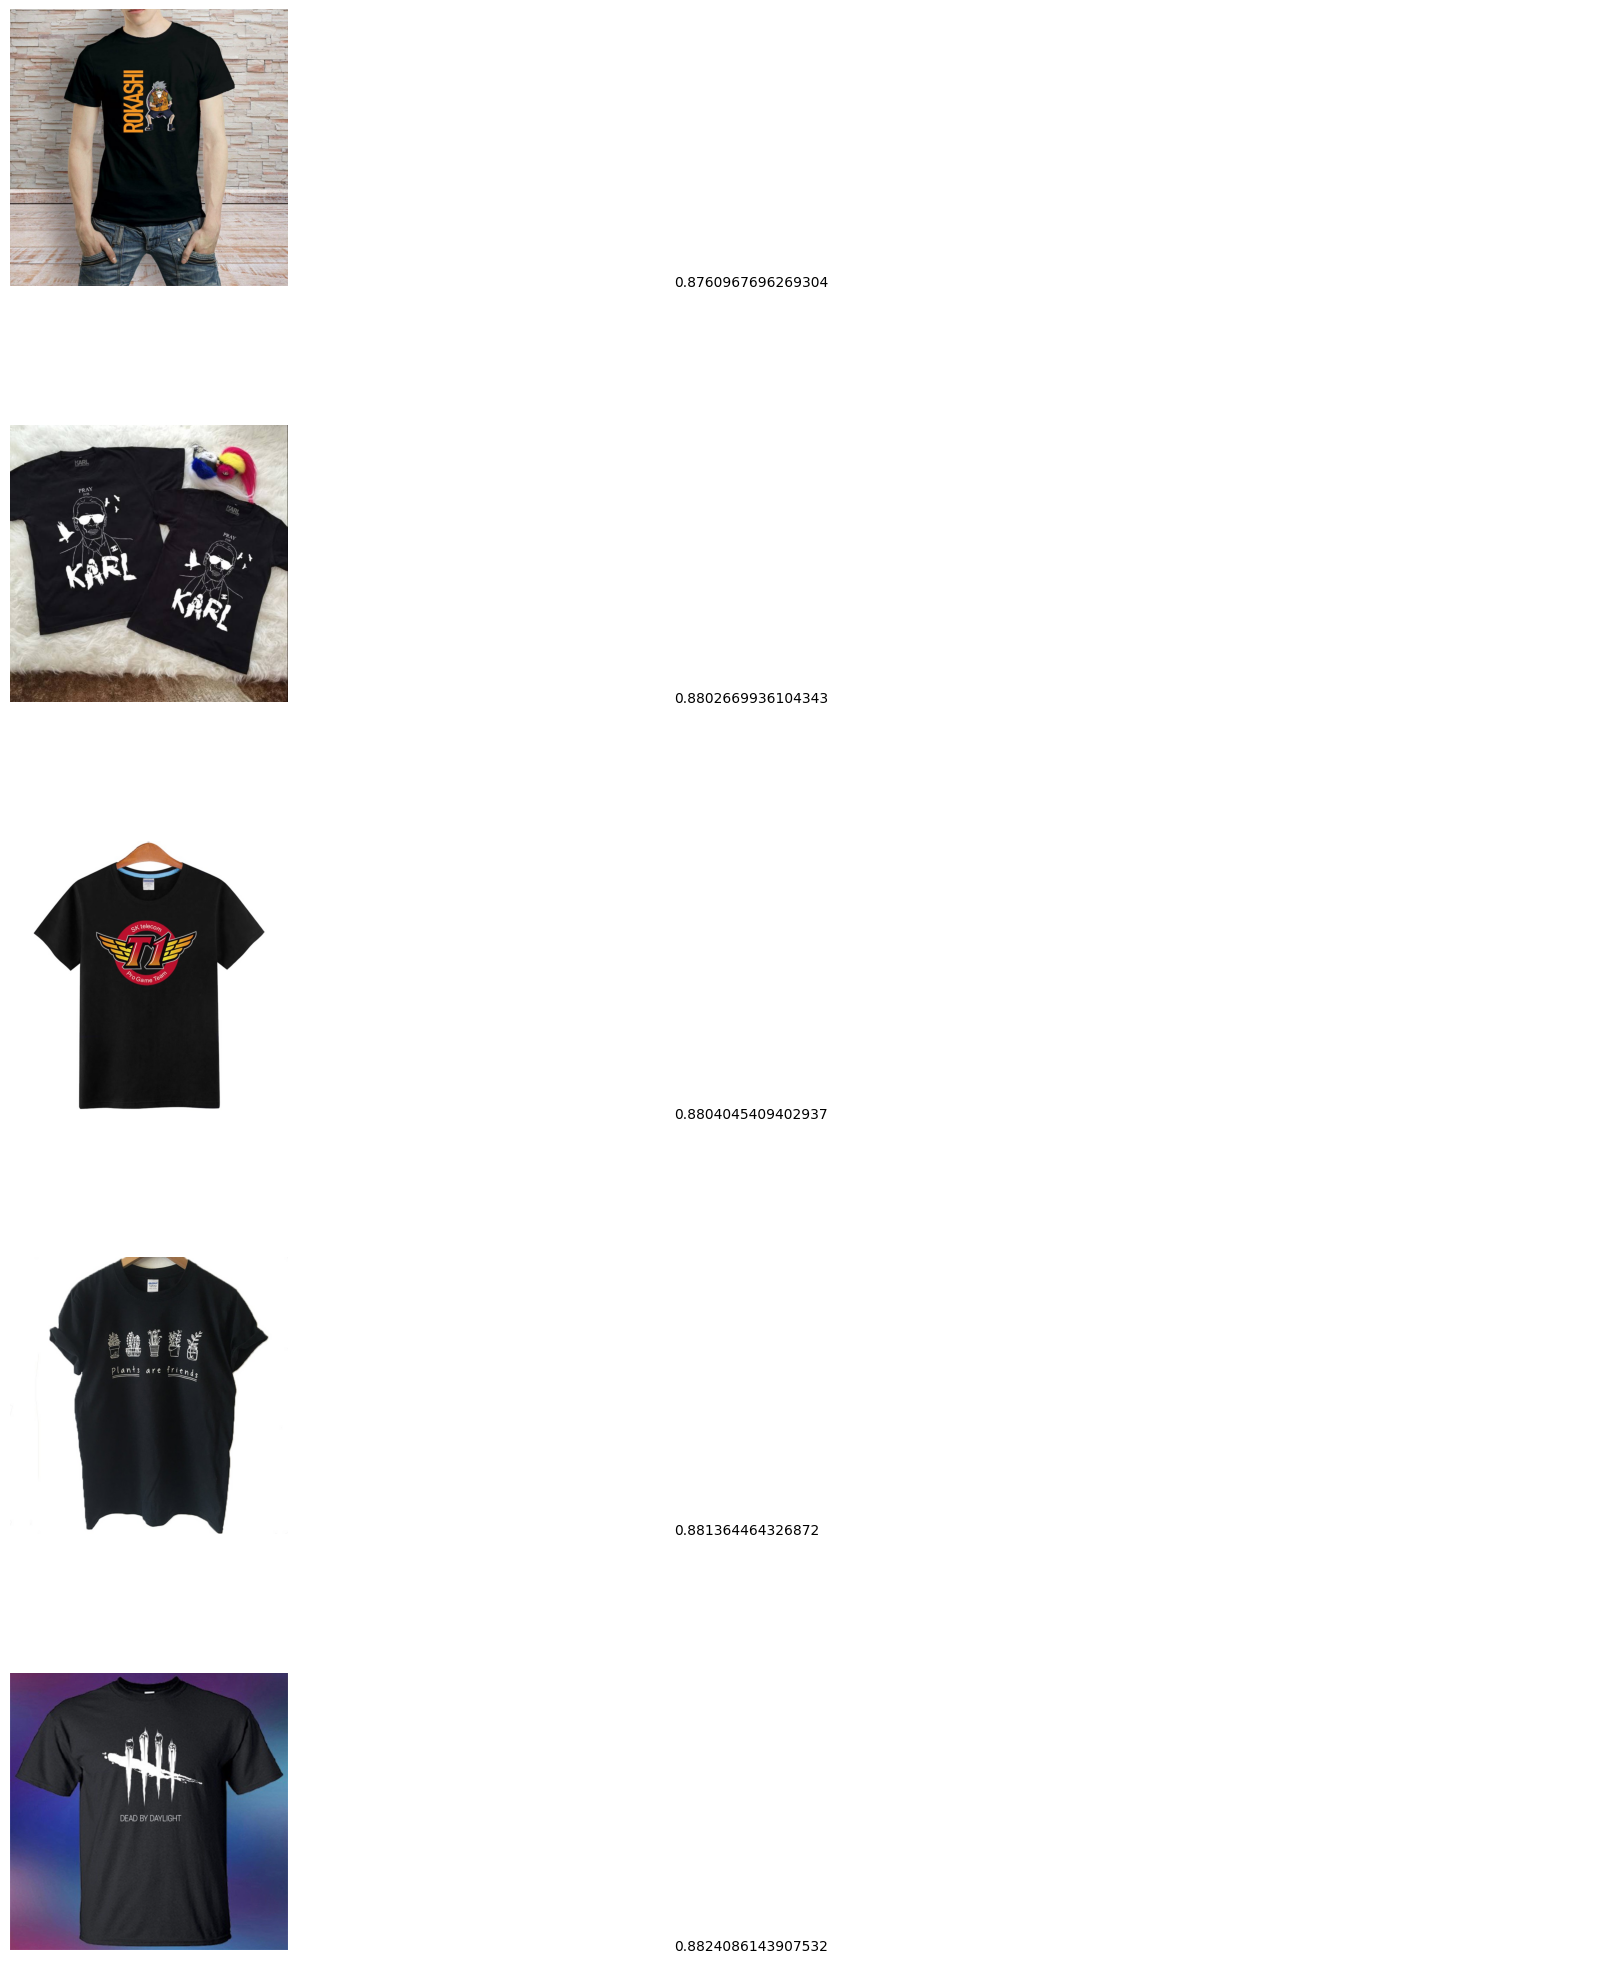

In [ ]:
query = """
  SELECT * FROM `bqml_mm_search.vector_search_results`
  ORDER BY distance;
"""

printImages(client.query(query))